In [1]:
"""REFERENCE LINKS
1)https://medium.com/towards-formula-1-analysis/learning-data-analysis-with-python-through-formula-1-five-quick-tricks-for-analyzing-data-with-cf0801e100ed
2)https://medium.com/towards-formula-1-analysis/analyzing-formula-1-race-pace-using-python-c053d80f48ff
3)https://medium.com/towards-formula-1-analysis/visualizing-formula-1-race-strategies-in-python-using-fastf1-pandas-and-matplotlib-95fe6b3298fa
4)https://medium.com/towards-formula-1-analysis/how-to-analyze-formula-1-telemetry-in-2022-a-python-tutorial-309ced4b8992
5)https://medium.com/towards-formula-1-analysis/how-to-recreate-the-formula-1-aws-corner-analysis-in-python-37c26363c47b
6)https://medium.com/towards-formula-1-analysis/how-to-start-analyzing-the-2022-formula-1-pre-season-testing-data-ee405e2695ed
7)https://medium.com/towards-formula-1-analysis/how-to-analyze-formula-1-data-with-python-a-beginners-tutorial-23087c4eef1d
"""

'REFERENCE LINKS\n1)https://medium.com/towards-formula-1-analysis/learning-data-analysis-with-python-through-formula-1-five-quick-tricks-for-analyzing-data-with-cf0801e100ed\n2)https://medium.com/towards-formula-1-analysis/analyzing-formula-1-race-pace-using-python-c053d80f48ff\n3)https://medium.com/towards-formula-1-analysis/visualizing-formula-1-race-strategies-in-python-using-fastf1-pandas-and-matplotlib-95fe6b3298fa\n4)https://medium.com/towards-formula-1-analysis/how-to-analyze-formula-1-telemetry-in-2022-a-python-tutorial-309ced4b8992\n5)https://medium.com/towards-formula-1-analysis/how-to-recreate-the-formula-1-aws-corner-analysis-in-python-37c26363c47b\n6)https://medium.com/towards-formula-1-analysis/how-to-start-analyzing-the-2022-formula-1-pre-season-testing-data-ee405e2695ed\n7)https://medium.com/towards-formula-1-analysis/how-to-analyze-formula-1-data-with-python-a-beginners-tutorial-23087c4eef1d\n'

In [2]:
import fastf1 as ff1
import pandas as pd
import matplotlib.pyplot as plt
from fastf1 import plotting
from fastf1 import utils
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np

In [3]:
ff1.Cache.enable_cache('cache')

In [4]:
ff1.get_event_schedule(2022)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
0,0,Spain,Spain,FORMULA 1 PRE-SEASON TRACK SESSION 2022,2022-02-25 18:00:00,Pre-Season Track Session,testing,Practice 1,2022-02-23 09:00:00,Practice 2,2022-02-24 09:00:00,Practice 3,2022-02-25 09:00:00,None,NaT,None,NaT,False
1,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2022,2022-03-12 19:00:00,Pre-Season Test,testing,Practice 1,2022-03-10 10:00:00,Practice 2,2022-03-11 10:00:00,Practice 3,2022-03-12 10:00:00,None,NaT,None,NaT,True
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True
8,7,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True


In [5]:
session=ff1.get_session(2022,'Bahrain','Q')

In [6]:
gp_1=ff1.get_event_schedule(2022).get_event_by_round(1)

In [7]:
gp_1

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022
EventDate                                   2022-03-20 20:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2022-03-18 15:00:00
Session2                                             Practice 2
Session2Date                                2022-03-18 18:00:00
Session3                                             Practice 3
Session3Date                                2022-03-19 15:00:00
Session4                                             Qualifying
Session4Date                                2022-03-19 18:00:00
Session5                                

In [8]:
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for race_control_messages. Loading data...
api            INFO 	Fetching race control messages...
api            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']


In [9]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:31.471000,0 days 00:01:30.932000,0 days 00:01:30.558000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,2.0,0.0,0 days 00:01:31.785000,0 days 00:01:30.757000,0 days 00:01:30.681000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,0.0,0 days 00:01:31.567000,0 days 00:01:30.787000,0 days 00:01:30.687000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,0.0,0 days 00:01:32.311000,0 days 00:01:31.008000,0 days 00:01:30.921000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,5.0,0.0,0 days 00:01:32.285000,0 days 00:01:31.048000,0 days 00:01:31.238000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,0.0,0 days 00:01:31.919000,0 days 00:01:31.717000,0 days 00:01:31.560000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,7.0,0.0,0 days 00:01:31.955000,0 days 00:01:31.461000,0 days 00:01:31.808000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,8.0,0.0,0 days 00:01:32.346000,0 days 00:01:31.621000,0 days 00:01:32.195000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,9.0,0.0,0 days 00:01:32.269000,0 days 00:01:31.252000,0 days 00:01:32.216000,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,10.0,0.0,0 days 00:01:32.096000,0 days 00:01:31.635000,0 days 00:01:32.338000,NaT,,0.0


In [10]:
session.results.iloc[0:10].loc[:,['Abbreviation','Q3']]

,Abbreviation,Q3
16,LEC,0 days 00:01:30.558000
1,VER,0 days 00:01:30.681000
55,SAI,0 days 00:01:30.687000
11,PER,0 days 00:01:30.921000
44,HAM,0 days 00:01:31.238000
77,BOT,0 days 00:01:31.560000
20,MAG,0 days 00:01:31.808000
14,ALO,0 days 00:01:32.195000
63,RUS,0 days 00:01:32.216000
10,GAS,0 days 00:01:32.338000


In [11]:
laps=session.load_laps(with_telemetry=True)

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort

In [12]:
laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:23:24.977000,16,NaT,1,0 days 00:21:25.144000,NaT,NaT,0 days 00:00:47.783000,0 days 00:00:37.692000,NaT,...,SOFT,1.0,True,1,0 days 00:21:25.144000,Ferrari,LEC,1,False,2022-03-19 15:06:26.073
1,0 days 00:24:56.448000,16,0 days 00:01:31.471000,2,NaT,NaT,0 days 00:00:29.367000,0 days 00:00:39.067000,0 days 00:00:23.037000,0 days 00:23:54.344000,...,SOFT,2.0,True,1,0 days 00:23:24.977000,Ferrari,LEC,1,True,2022-03-19 15:08:25.906
2,0 days 00:26:49.497000,16,0 days 00:01:53.049000,3,NaT,0 days 00:26:47.694000,0 days 00:00:35.658000,0 days 00:00:49.179000,0 days 00:00:28.212000,0 days 00:25:32.106000,...,SOFT,3.0,True,1,0 days 00:24:56.448000,Ferrari,LEC,1,False,2022-03-19 15:09:57.377
3,0 days 00:44:52.882000,16,NaT,4,0 days 00:43:05.158000,NaT,NaT,0 days 00:00:45.919000,0 days 00:00:29.579000,NaT,...,SOFT,4.0,False,2,0 days 00:26:49.497000,Ferrari,LEC,1,False,2022-03-19 15:11:50.426
4,0 days 00:46:24.238000,16,0 days 00:01:31.356000,5,NaT,NaT,0 days 00:00:29.413000,0 days 00:00:39.065000,0 days 00:00:22.878000,0 days 00:45:22.295000,...,SOFT,5.0,False,2,0 days 00:44:52.882000,Ferrari,LEC,1,True,2022-03-19 15:29:53.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0 days 00:25:21.165000,6,0 days 00:01:33.634000,4,NaT,NaT,0 days 00:00:29.810000,0 days 00:00:40.495000,0 days 00:00:23.329000,0 days 00:24:17.341000,...,SOFT,2.0,True,2,0 days 00:23:47.531000,Williams,LAT,1,True,2022-03-19 15:08:48.460
252,0 days 00:27:17.730000,6,0 days 00:01:56.565000,5,NaT,0 days 00:27:15.890000,0 days 00:00:32.953000,0 days 00:00:54.041000,0 days 00:00:29.571000,0 days 00:25:54.118000,...,SOFT,3.0,True,2,0 days 00:25:21.165000,Williams,LAT,1,False,2022-03-19 15:10:22.094
253,0 days 00:32:07.289000,6,NaT,6,0 days 00:30:01.230000,NaT,NaT,0 days 00:00:53.772000,0 days 00:00:33.350000,NaT,...,SOFT,1.0,True,3,0 days 00:27:17.730000,Williams,LAT,1,False,2022-03-19 15:12:18.659
254,0 days 00:33:41.075000,6,0 days 00:01:33.786000,7,NaT,NaT,0 days 00:00:30.116000,0 days 00:00:40.370000,0 days 00:00:23.300000,0 days 00:32:37.405000,...,SOFT,2.0,True,3,0 days 00:32:07.289000,Williams,LAT,1,True,2022-03-19 15:17:08.218


In [13]:
fastestlap=session.laps.pick_fastest()

In [14]:
fastestlap

Time                      0 days 01:14:47.968000
DriverNumber                                  16
LapTime                   0 days 00:01:30.558000
LapNumber                                     14
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.115000
Sector2Time               0 days 00:00:38.702000
Sector3Time               0 days 00:00:22.741000
Sector1SessionTime        0 days 01:13:46.525000
Sector2SessionTime        0 days 01:14:25.227000
Sector3SessionTime        0 days 01:14:47.968000
SpeedI1                                    241.0
SpeedI2                                    270.0
SpeedFL                                    288.0
SpeedST                                    316.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint               

In [15]:
fastestlap['LapTime']

Timedelta('0 days 00:01:30.558000')

In [16]:
fastestlap['Driver']

'LEC'

In [17]:
#RACE ANALYSIS
race=ff1.get_session(2022,'Bahrain','R')

In [18]:
pd.options.mode.chained_assignment=None

In [19]:
laps=session.load_laps()

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort

In [20]:
laps.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 00:23:24.977000,16,NaT,1,0 days 00:21:25.144000,NaT,NaT,0 days 00:00:47.783000,0 days 00:00:37.692000,NaT,...,False,SOFT,1.0,True,1,0 days 00:21:25.144000,Ferrari,LEC,1,False
1,0 days 00:24:56.448000,16,0 days 00:01:31.471000,2,NaT,NaT,0 days 00:00:29.367000,0 days 00:00:39.067000,0 days 00:00:23.037000,0 days 00:23:54.344000,...,False,SOFT,2.0,True,1,0 days 00:23:24.977000,Ferrari,LEC,1,True
2,0 days 00:26:49.497000,16,0 days 00:01:53.049000,3,NaT,0 days 00:26:47.694000,0 days 00:00:35.658000,0 days 00:00:49.179000,0 days 00:00:28.212000,0 days 00:25:32.106000,...,False,SOFT,3.0,True,1,0 days 00:24:56.448000,Ferrari,LEC,1,False
3,0 days 00:44:52.882000,16,NaT,4,0 days 00:43:05.158000,NaT,NaT,0 days 00:00:45.919000,0 days 00:00:29.579000,NaT,...,False,SOFT,4.0,False,2,0 days 00:26:49.497000,Ferrari,LEC,1,False
4,0 days 00:46:24.238000,16,0 days 00:01:31.356000,5,NaT,NaT,0 days 00:00:29.413000,0 days 00:00:39.065000,0 days 00:00:22.878000,0 days 00:45:22.295000,...,False,SOFT,5.0,False,2,0 days 00:44:52.882000,Ferrari,LEC,1,True


In [21]:
laps.T

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Time,0 days 00:23:24.977000,0 days 00:24:56.448000,0 days 00:26:49.497000,0 days 00:44:52.882000,0 days 00:46:24.238000,0 days 00:48:11.172000,0 days 00:52:57.658000,0 days 00:54:28.590000,0 days 00:56:17.533000,0 days 01:05:57.048000,...,0 days 00:33:01.815000,0 days 00:34:47.158000,0 days 00:16:58.666000,0 days 00:18:42.110000,0 days 00:23:47.531000,0 days 00:25:21.165000,0 days 00:27:17.730000,0 days 00:32:07.289000,0 days 00:33:41.075000,0 days 00:35:43.081000
DriverNumber,16,16,16,16,16,16,16,16,16,16,...,18,18,6,6,6,6,6,6,6,6
LapTime,NaT,0 days 00:01:31.471000,0 days 00:01:53.049000,NaT,0 days 00:01:31.356000,0 days 00:01:46.934000,NaT,0 days 00:01:30.932000,0 days 00:01:48.943000,NaT,...,0 days 00:01:33.032000,0 days 00:01:45.343000,NaT,0 days 00:01:43.444000,NaT,0 days 00:01:33.634000,0 days 00:01:56.565000,NaT,0 days 00:01:33.786000,0 days 00:02:02.006000
LapNumber,1,2,3,4,5,6,7,8,9,10,...,5,6,1,2,3,4,5,6,7,8
PitOutTime,0 days 00:21:25.144000,NaT,NaT,0 days 00:43:05.158000,NaT,NaT,0 days 00:51:08.067000,NaT,NaT,0 days 01:04:09.214000,...,NaT,NaT,0 days 00:15:11.777000,NaT,0 days 00:21:38.333000,NaT,NaT,0 days 00:30:01.230000,NaT,NaT
PitInTime,NaT,NaT,0 days 00:26:47.694000,NaT,NaT,0 days 00:48:09.380000,NaT,NaT,0 days 00:56:15.707000,NaT,...,NaT,0 days 00:34:45.333000,NaT,0 days 00:18:40.321000,NaT,NaT,0 days 00:27:15.890000,NaT,NaT,0 days 00:35:41.291000
Sector1Time,NaT,0 days 00:00:29.367000,0 days 00:00:35.658000,NaT,0 days 00:00:29.413000,0 days 00:00:33.843000,NaT,0 days 00:00:29.355000,0 days 00:00:34.668000,NaT,...,0 days 00:00:29.906000,0 days 00:00:32.247000,NaT,0 days 00:00:30.834000,NaT,0 days 00:00:29.810000,0 days 00:00:32.953000,NaT,0 days 00:00:30.116000,0 days 00:00:35.597000
Sector2Time,0 days 00:00:47.783000,0 days 00:00:39.067000,0 days 00:00:49.179000,0 days 00:00:45.919000,0 days 00:00:39.065000,0 days 00:00:45.777000,0 days 00:00:47.622000,0 days 00:00:38.850000,0 days 00:00:45.679000,0 days 00:00:49.713000,...,0 days 00:00:39.844000,0 days 00:00:44.190000,0 days 00:00:45.969000,0 days 00:00:42.612000,0 days 00:00:49.485000,0 days 00:00:40.495000,0 days 00:00:54.041000,0 days 00:00:53.772000,0 days 00:00:40.370000,0 days 00:00:53.898000
Sector3Time,0 days 00:00:37.692000,0 days 00:00:23.037000,0 days 00:00:28.212000,0 days 00:00:29.579000,0 days 00:00:22.878000,0 days 00:00:27.314000,0 days 00:00:28.327000,0 days 00:00:22.727000,0 days 00:00:28.596000,0 days 00:00:25.004000,...,0 days 00:00:23.282000,0 days 00:00:28.906000,0 days 00:00:25.979000,0 days 00:00:29.998000,0 days 00:00:39.062000,0 days 00:00:23.329000,0 days 00:00:29.571000,0 days 00:00:33.350000,0 days 00:00:23.300000,0 days 00:00:32.511000
Sector1SessionTime,NaT,0 days 00:23:54.344000,0 days 00:25:32.106000,NaT,0 days 00:45:22.295000,0 days 00:46:58.081000,NaT,0 days 00:53:27.013000,0 days 00:55:03.258000,NaT,...,0 days 00:31:58.689000,0 days 00:33:34.062000,NaT,0 days 00:17:29.500000,NaT,0 days 00:24:17.341000,0 days 00:25:54.118000,NaT,0 days 00:32:37.405000,0 days 00:34:16.672000


In [22]:
laps.head().T

,0,1,2,3,4
Time,0 days 00:23:24.977000,0 days 00:24:56.448000,0 days 00:26:49.497000,0 days 00:44:52.882000,0 days 00:46:24.238000
DriverNumber,16,16,16,16,16
LapTime,NaT,0 days 00:01:31.471000,0 days 00:01:53.049000,NaT,0 days 00:01:31.356000
LapNumber,1,2,3,4,5
PitOutTime,0 days 00:21:25.144000,NaT,NaT,0 days 00:43:05.158000,NaT
PitInTime,NaT,NaT,0 days 00:26:47.694000,NaT,NaT
Sector1Time,NaT,0 days 00:00:29.367000,0 days 00:00:35.658000,NaT,0 days 00:00:29.413000
Sector2Time,0 days 00:00:47.783000,0 days 00:00:39.067000,0 days 00:00:49.179000,0 days 00:00:45.919000,0 days 00:00:39.065000
Sector3Time,0 days 00:00:37.692000,0 days 00:00:23.037000,0 days 00:00:28.212000,0 days 00:00:29.579000,0 days 00:00:22.878000
Sector1SessionTime,NaT,0 days 00:23:54.344000,0 days 00:25:32.106000,NaT,0 days 00:45:22.295000


In [23]:
laps.describe()

,Time,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,Stint,LapStartTime
count,256,165,256.000000,84,84,172,255,249,172,255,249,255.000000,255.000000,172.000000,256.000000,256.000000,256.000000,256
mean,0 days 00:43:40.593500,0 days 00:01:43.001109090,7.515625,0 days 00:40:31.063035714,0 days 00:45:54.872345238,0 days 00:00:32.682511627,0 days 00:00:45.516560784,0 days 00:00:27.544626506,0 days 00:43:07.588151162,0 days 00:43:04.907733333,0 days 00:42:44.201457831,211.447059,227.658824,285.936047,243.683594,2.437500,2.738281,0 days 00:40:24.775867187
std,0 days 00:18:03.411229511,0 days 00:00:12.353665771,4.586398,0 days 00:18:08.888771825,0 days 00:17:59.622629019,0 days 00:00:03.857748389,0 days 00:00:05.267234395,0 days 00:00:04.332589284,0 days 00:18:03.749591239,0 days 00:17:57.995609684,0 days 00:17:24.026256591,28.458080,36.377251,2.497129,66.968455,1.321022,1.489130,0 days 00:17:42.845802180
min,0 days 00:16:48.876000,0 days 00:01:30.558000,1.000000,0 days 00:15:02.640000,0 days 00:18:28.415000,0 days 00:00:28.970000,0 days 00:00:38.702000,0 days 00:00:22.707000,0 days 00:17:19.802000,0 days 00:16:23.836000,0 days 00:16:48.876000,68.000000,106.000000,276.000000,64.000000,1.000000,1.000000,0 days 00:15:02.640000
25%,0 days 00:26:49.341250,0 days 00:01:32.195000,4.000000,0 days 00:23:21.433000,0 days 00:28:29.685750,0 days 00:00:29.542500,0 days 00:00:39.813000,0 days 00:00:23.203000,0 days 00:25:48.418250,0 days 00:26:22.062500,0 days 00:26:44.851000,195.000000,204.000000,285.000000,187.000000,1.000000,1.000000,0 days 00:24:55.224250
50%,0 days 00:44:27.610500,0 days 00:01:33.786000,7.000000,0 days 00:42:29.340000,0 days 00:47:38.975500,0 days 00:00:30.115500,0 days 00:00:46.092000,0 days 00:00:27.369000,0 days 00:44:45.146500,0 days 00:43:58.050000,0 days 00:43:26.986000,216.000000,227.000000,286.000000,249.500000,2.000000,3.000000,0 days 00:34:07.966500
75%,0 days 00:55:30.621250,0 days 00:01:53.049000,11.000000,0 days 00:51:55.999500,0 days 00:57:07.041000,0 days 00:00:35.234250,0 days 00:00:49.109000,0 days 00:00:30.565000,0 days 00:55:17.882250,0 days 00:55:03.768000,0 days 00:54:52.290000,237.000000,267.000000,287.250000,313.000000,3.000000,4.000000,0 days 00:53:43.437500
max,0 days 01:17:57.149000,0 days 00:02:24.957000,21.000000,0 days 01:12:22.922000,0 days 01:17:57.149000,0 days 00:00:47.349000,0 days 00:01:08.030000,0 days 00:00:46.793000,0 days 01:17:57.149000,0 days 01:17:16.312000,0 days 01:17:12.228000,242.000000,272.000000,291.000000,323.000000,6.000000,7.000000,0 days 01:15:47.991000


In [24]:
#fastestdriver
laps.loc[laps['LapTime']==min(laps['LapTime'].dropna())]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate
13,0 days 01:14:47.968000,16,0 days 00:01:30.558000,14,NaT,NaT,0 days 00:00:29.115000,0 days 00:00:38.702000,0 days 00:00:22.741000,0 days 01:13:46.525000,...,True,SOFT,2.0,True,5,0 days 01:13:17.410000,Ferrari,LEC,1,True


In [25]:
#counting tyre usage
laps['Compound'].value_counts()

SOFT      252
MEDIUM      4
Name: Compound, dtype: int64

In [26]:
#Race Pace within teams
laps[['Team','Driver','LapTime']].groupby(['Team','Driver']).mean().sort_values(['Team','LapTime'])

LapTime
Team            Driver                          
Alfa Romeo      BOT    0 days 00:01:41.153555555
                ZHO       0 days 00:01:43.950750
AlphaTauri      GAS    0 days 00:01:41.026230769
                TSU       0 days 00:01:42.063200
Alpine          ALO       0 days 00:01:42.851500
                OCO       0 days 00:01:45.390250
Aston Martin    STR       0 days 00:01:41.674500
                HUL       0 days 00:01:44.139500
Ferrari         LEC       0 days 00:01:41.588700
                SAI       0 days 00:01:44.226800
Haas F1 Team    MAG    0 days 00:01:41.060857142
                MSC    0 days 00:01:41.483857142
McLaren         NOR       0 days 00:01:45.095000
                RIC       0 days 00:01:46.142500
Mercedes        HAM    0 days 00:01:43.248272727
                RUS    0 days 00:01:44.373272727
Red Bull Racing PER    0 days 00:01:41.120363636
                VER       0 days 00:01:42.584900
Williams        ALB       0 days 00:01:43.141250
                LAT       0 days 00:01:45.887000

In [27]:
#fastest drivers through speed trap
laps[['Driver','SpeedST']].groupby(['Driver']).max().sort_values('SpeedST',ascending=False)

,SpeedST
Driver,
PER,323.0
VER,322.0
ALO,321.0
OCO,320.0
LAT,319.0
TSU,318.0
MAG,318.0
MSC,318.0
GAS,317.0


In [28]:
#convert laptimes into seconds
laps['LapTimeSeconds']=laps['LapTime'].dt.total_seconds()

In [29]:
#to get accurate laps we exclude inlaps and outlaps
laps=laps.loc[(laps['PitOutTime'].isnull()&laps['PitInTime'].isnull())]

In [30]:
laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapTimeSeconds
1,0 days 00:24:56.448000,16,0 days 00:01:31.471000,2,NaT,NaT,0 days 00:00:29.367000,0 days 00:00:39.067000,0 days 00:00:23.037000,0 days 00:23:54.344000,...,SOFT,2.0,True,1,0 days 00:23:24.977000,Ferrari,LEC,1,True,91.471
4,0 days 00:46:24.238000,16,0 days 00:01:31.356000,5,NaT,NaT,0 days 00:00:29.413000,0 days 00:00:39.065000,0 days 00:00:22.878000,0 days 00:45:22.295000,...,SOFT,5.0,False,2,0 days 00:44:52.882000,Ferrari,LEC,1,True,91.356
7,0 days 00:54:28.590000,16,0 days 00:01:30.932000,8,NaT,NaT,0 days 00:00:29.355000,0 days 00:00:38.850000,0 days 00:00:22.727000,0 days 00:53:27.013000,...,SOFT,2.0,True,3,0 days 00:52:57.658000,Ferrari,LEC,1,True,90.932
10,0 days 01:07:27.779000,16,0 days 00:01:30.731000,11,NaT,NaT,0 days 00:00:29.199000,0 days 00:00:38.825000,0 days 00:00:22.707000,0 days 01:06:26.247000,...,SOFT,2.0,True,4,0 days 01:05:57.048000,Ferrari,LEC,1,True,90.731
13,0 days 01:14:47.968000,16,0 days 00:01:30.558000,14,NaT,NaT,0 days 00:00:29.115000,0 days 00:00:38.702000,0 days 00:00:22.741000,0 days 01:13:46.525000,...,SOFT,2.0,True,5,0 days 01:13:17.410000,Ferrari,LEC,1,True,90.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0 days 00:32:41.097000,3,0 days 00:01:32.945000,7,NaT,NaT,0 days 00:00:29.763000,0 days 00:00:39.862000,0 days 00:00:23.320000,0 days 00:31:37.915000,...,SOFT,2.0,True,2,0 days 00:31:08.152000,McLaren,RIC,1,True,92.945
243,0 days 00:24:10.250000,18,0 days 00:01:33.309000,2,NaT,NaT,0 days 00:00:29.917000,0 days 00:00:39.995000,0 days 00:00:23.397000,0 days 00:23:06.858000,...,SOFT,2.0,True,1,0 days 00:22:36.941000,Aston Martin,STR,1,True,93.309
246,0 days 00:33:01.815000,18,0 days 00:01:33.032000,5,NaT,NaT,0 days 00:00:29.906000,0 days 00:00:39.844000,0 days 00:00:23.282000,0 days 00:31:58.689000,...,SOFT,2.0,True,2,0 days 00:31:28.783000,Aston Martin,STR,1,True,93.032
251,0 days 00:25:21.165000,6,0 days 00:01:33.634000,4,NaT,NaT,0 days 00:00:29.810000,0 days 00:00:40.495000,0 days 00:00:23.329000,0 days 00:24:17.341000,...,SOFT,2.0,True,2,0 days 00:23:47.531000,Williams,LAT,1,True,93.634


In [31]:
#REMOVING THE OUTLIERS

In [32]:
q75=laps['LapTimeSeconds'].quantile(0.75)
q25=laps['LapTimeSeconds'].quantile(0.25)

In [33]:
iqr=q75-q25

In [34]:
lapmax=q75+(1.5*iqr)
lapmin=q25-(1.5*iqr)

In [35]:
laps.loc[laps['LapTimeSeconds']<lapmin,'LapTimeSeconds']=np.nan
laps.loc[laps['LapTimeSeconds']>lapmax,'LapTimeSeconds']=np.nan

In [36]:
#PLOTTING THE DATA

In [37]:
drivers=['VER','LEC','HAM','RIC','ALB','SAI']

In [38]:
#so that we dont get any equally styled lines while viz teammates
teamsviz=[]

In [39]:
#readjust plot size(making it bigger)
plt.rcParams['figure.figsize']=[10,10]

In [40]:
%matplotlib inline

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly

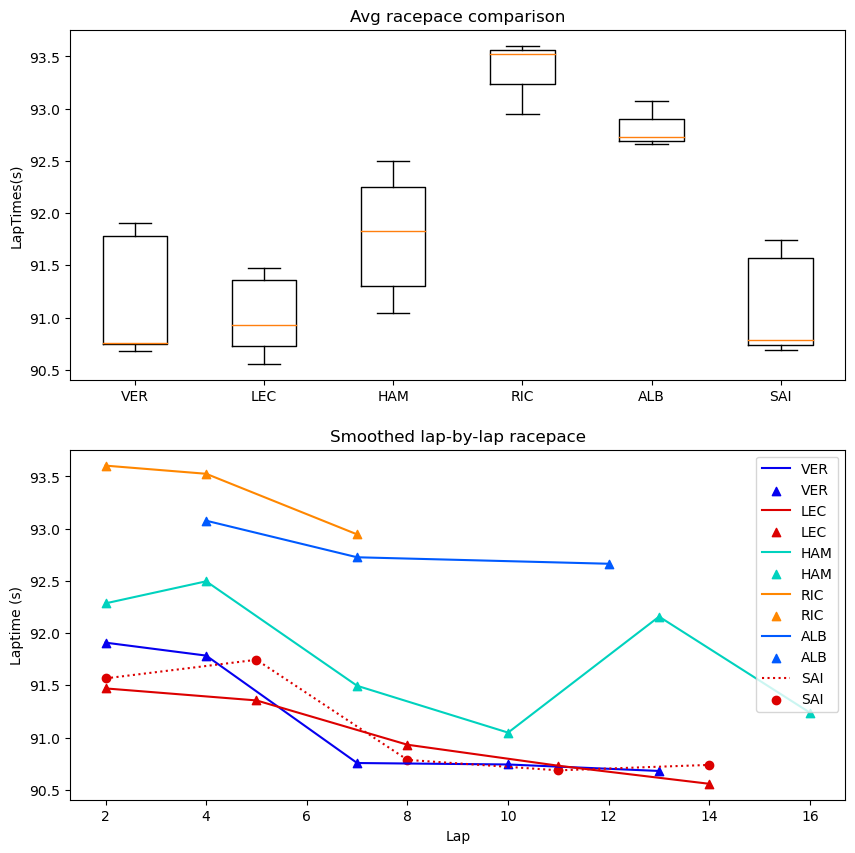

In [41]:
#create 2 subplots- 1 for boxplot, 1 for lap-by-lap comparison
fig,ax=plt.subplots(2)

#boxplot
laptimes=[laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers]
ax[0].boxplot(laptimes,labels=drivers)
ax[0].set_title('Avg racepace comparison')
ax[0].set(ylabel='LapTimes(s)')

#lap by lap
for d in drivers:
    dlaps=laps.pick_driver(d)[['LapNumber','LapTimeSeconds','Team']]
    
    #selecting all laps from that driver
    dlaps=dlaps.dropna()
    
    #extracting team for coloring
    t=pd.unique(dlaps['Team'])[0]
    
    #x coord = lap no.
    x=dlaps['LapNumber']
    
    #y coord is smoothed line bw all lap times
    ypoly=np.polyfit(dlaps['LapNumber'],dlaps['LapTimeSeconds'],12)
    y=np.poly1d(ypoly)(dlaps['LapNumber'])
    
    #to see if the teammates arent rep by same line
    linestyle='-' if t not in teamsviz else ':'
    
    #plot
    ax[1].plot(x,y,label=d,color=ff1.plotting.team_color(t),linestyle=linestyle)
    
    #scatterplot for individual lap times
    ys=dlaps['LapTimeSeconds']
    scatmark='^' if t not in teamsviz else "o"
    ax[1].scatter(x,ys,label=d,color=ff1.plotting.team_color(t),marker=scatmark)
    
    #append labels
    ax[1].set(ylabel = 'Laptime (s)')
    ax[1].set(xlabel = 'Lap')
    
    #set title
    ax[1].set_title('Smoothed lap-by-lap racepace')
    
    #set legent
    ax[1].legend()
    
    #add team to teamsviz[] so that next time linestyle will be diff for teammates
    teamsviz.append(t)
    plt.savefig('racepace_comparison.png', dpi=300)

In [42]:
#RACE STRATEGIES

In [43]:
dstints=laps[['Driver','Stint','Compound','LapNumber']].groupby(['Driver','Stint','Compound']).count().reset_index()

In [44]:
dstints

,Driver,Stint,Compound,LapNumber
0,ALB,2,SOFT,1
1,ALB,3,SOFT,1
2,ALB,5,SOFT,1
3,ALO,1,SOFT,1
4,ALO,3,SOFT,1
...,...,...,...,...
73,VER,4,SOFT,1
74,ZHO,1,SOFT,1
75,ZHO,2,SOFT,1
76,ZHO,3,SOFT,1


In [45]:
dstints=dstints.rename(columns={'LapNumber':'StintLength'})
dstints

,Driver,Stint,Compound,StintLength
0,ALB,2,SOFT,1
1,ALB,3,SOFT,1
2,ALB,5,SOFT,1
3,ALO,1,SOFT,1
4,ALO,3,SOFT,1
...,...,...,...,...
73,VER,4,SOFT,1
74,ZHO,1,SOFT,1
75,ZHO,2,SOFT,1
76,ZHO,3,SOFT,1


In [46]:
dstints=dstints.sort_values(by=['Stint'])
dstints

,Driver,Stint,Compound,StintLength
56,RUS,1,SOFT,3
37,MSC,1,SOFT,1
24,HUL,1,SOFT,1
40,NOR,1,SOFT,3
44,OCO,1,SOFT,1
...,...,...,...,...
11,BOT,5,SOFT,1
60,RUS,5,SOFT,1
17,GAS,6,SOFT,1
53,PER,6,SOFT,1


In [47]:
year=2022
circuit='Bahrain'
compclrs={'SOFT':'#FF3333','MEDIUM':'#FFF200','HARD':'#EBEBEB','INTERMEDIATE':'#39B54A','WET':'#00AEEF'}

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


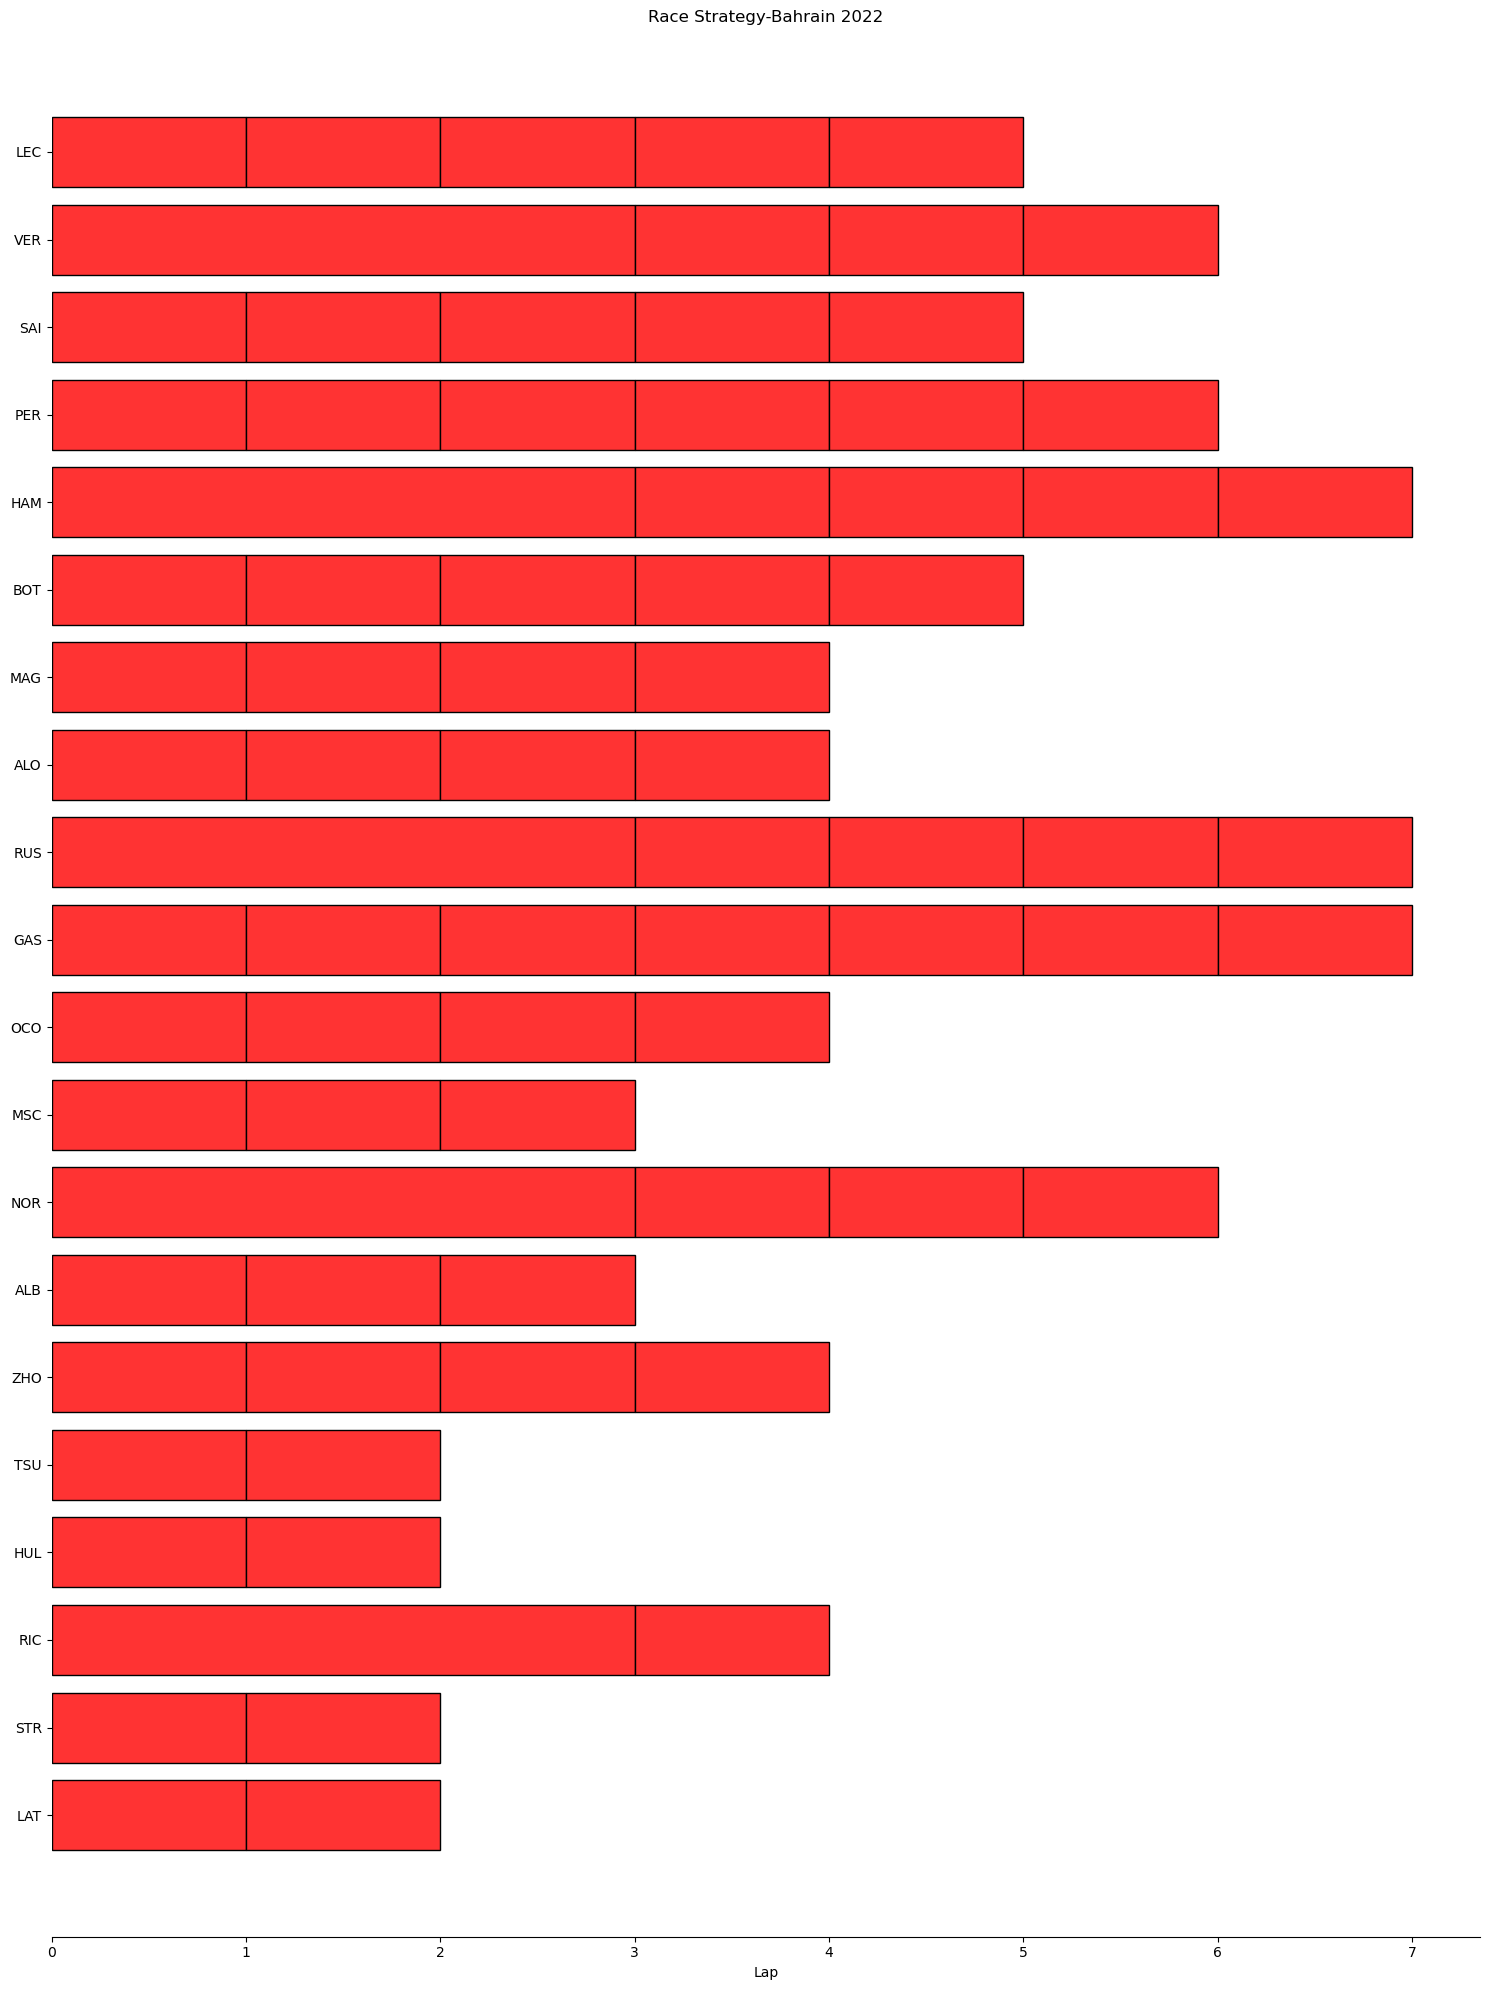

In [48]:
plt.rcParams["figure.figsize"]=[15,20]
plt.rcParams["figure.autolayout"]=True
fig,ax=plt.subplots()

for driver in session.results['Abbreviation']:
    stint=dstints.loc[dstints['Driver']==driver]
    prevstint=0
    for _, s in stint.iterrows():
        plt.barh([driver],s['StintLength'],left=prevstint,color=compclrs[s['Compound']],edgecolor="black")
        prevstint=prevstint+s['StintLength']
        
plt.title(f'Race Strategy-{circuit} {year}')
plt.xlabel('Lap')
plt.gca().invert_yaxis() #invert y axis
#remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('strategy.png',dpi=300)
plt.show()

In [49]:
#Its all red because they all used soft tyres XD

In [50]:
#TELEMETRY

In [51]:
print(session.laps)

                      Time DriverNumber                LapTime  LapNumber  \
0   0 days 00:23:24.977000           16                    NaT          1   
1   0 days 00:24:56.448000           16 0 days 00:01:31.471000          2   
2   0 days 00:26:49.497000           16 0 days 00:01:53.049000          3   
3   0 days 00:44:52.882000           16                    NaT          4   
4   0 days 00:46:24.238000           16 0 days 00:01:31.356000          5   
..                     ...          ...                    ...        ...   
251 0 days 00:25:21.165000            6 0 days 00:01:33.634000          4   
252 0 days 00:27:17.730000            6 0 days 00:01:56.565000          5   
253 0 days 00:32:07.289000            6                    NaT          6   
254 0 days 00:33:41.075000            6 0 days 00:01:33.786000          7   
255 0 days 00:35:43.081000            6 0 days 00:02:02.006000          8   

                PitOutTime              PitInTime            Sector1Time  \

In [52]:
d1='HAM'
#accessing all laps of the drivers .laps()
lapsd1=session.laps.pick_driver(d1)
#pick their fastest laps
fastestd1=lapsd1.pick_fastest()
#retrieving telemetry and add distance col
teled1=fastestd1.get_telemetry().add_distance()
#to make sure who is driving for what team
teamd1=fastestd1['Team']
teamd1

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals

'Mercedes'

In [53]:
d2='LEC'
#accessing all laps of the drivers .laps()
lapsd2=session.laps.pick_driver(d2)
#pick their fastest laps
fastestd2=lapsd2.pick_fastest()
#retrieving telemetry and add distance col
teled2=fastestd2.get_telemetry().add_distance()
#to make sure who is driving for what team
teamd2=fastestd2['Team']
teamd2

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals

'Ferrari'

In [54]:
#Extracting the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastestd1,fastestd2)

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals

In [55]:
#plotting
plotsize=[15,15]
plottitle=f"{session.event.year} {session.event.EventName} - {session.name} - {d1} V/S {d2}"
plotratios=[1,3,2,1,1,2,1]
plotfilename=plottitle.replace(" ","")+".png"

In [56]:
session.event

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022
EventDate                                   2022-03-20 20:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2022-03-18 15:00:00
Session2                                             Practice 2
Session2Date                                2022-03-18 18:00:00
Session3                                             Practice 3
Session3Date                                2022-03-19 15:00:00
Session4                                             Qualifying
Session4Date                                2022-03-19 18:00:00
Session5                                

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


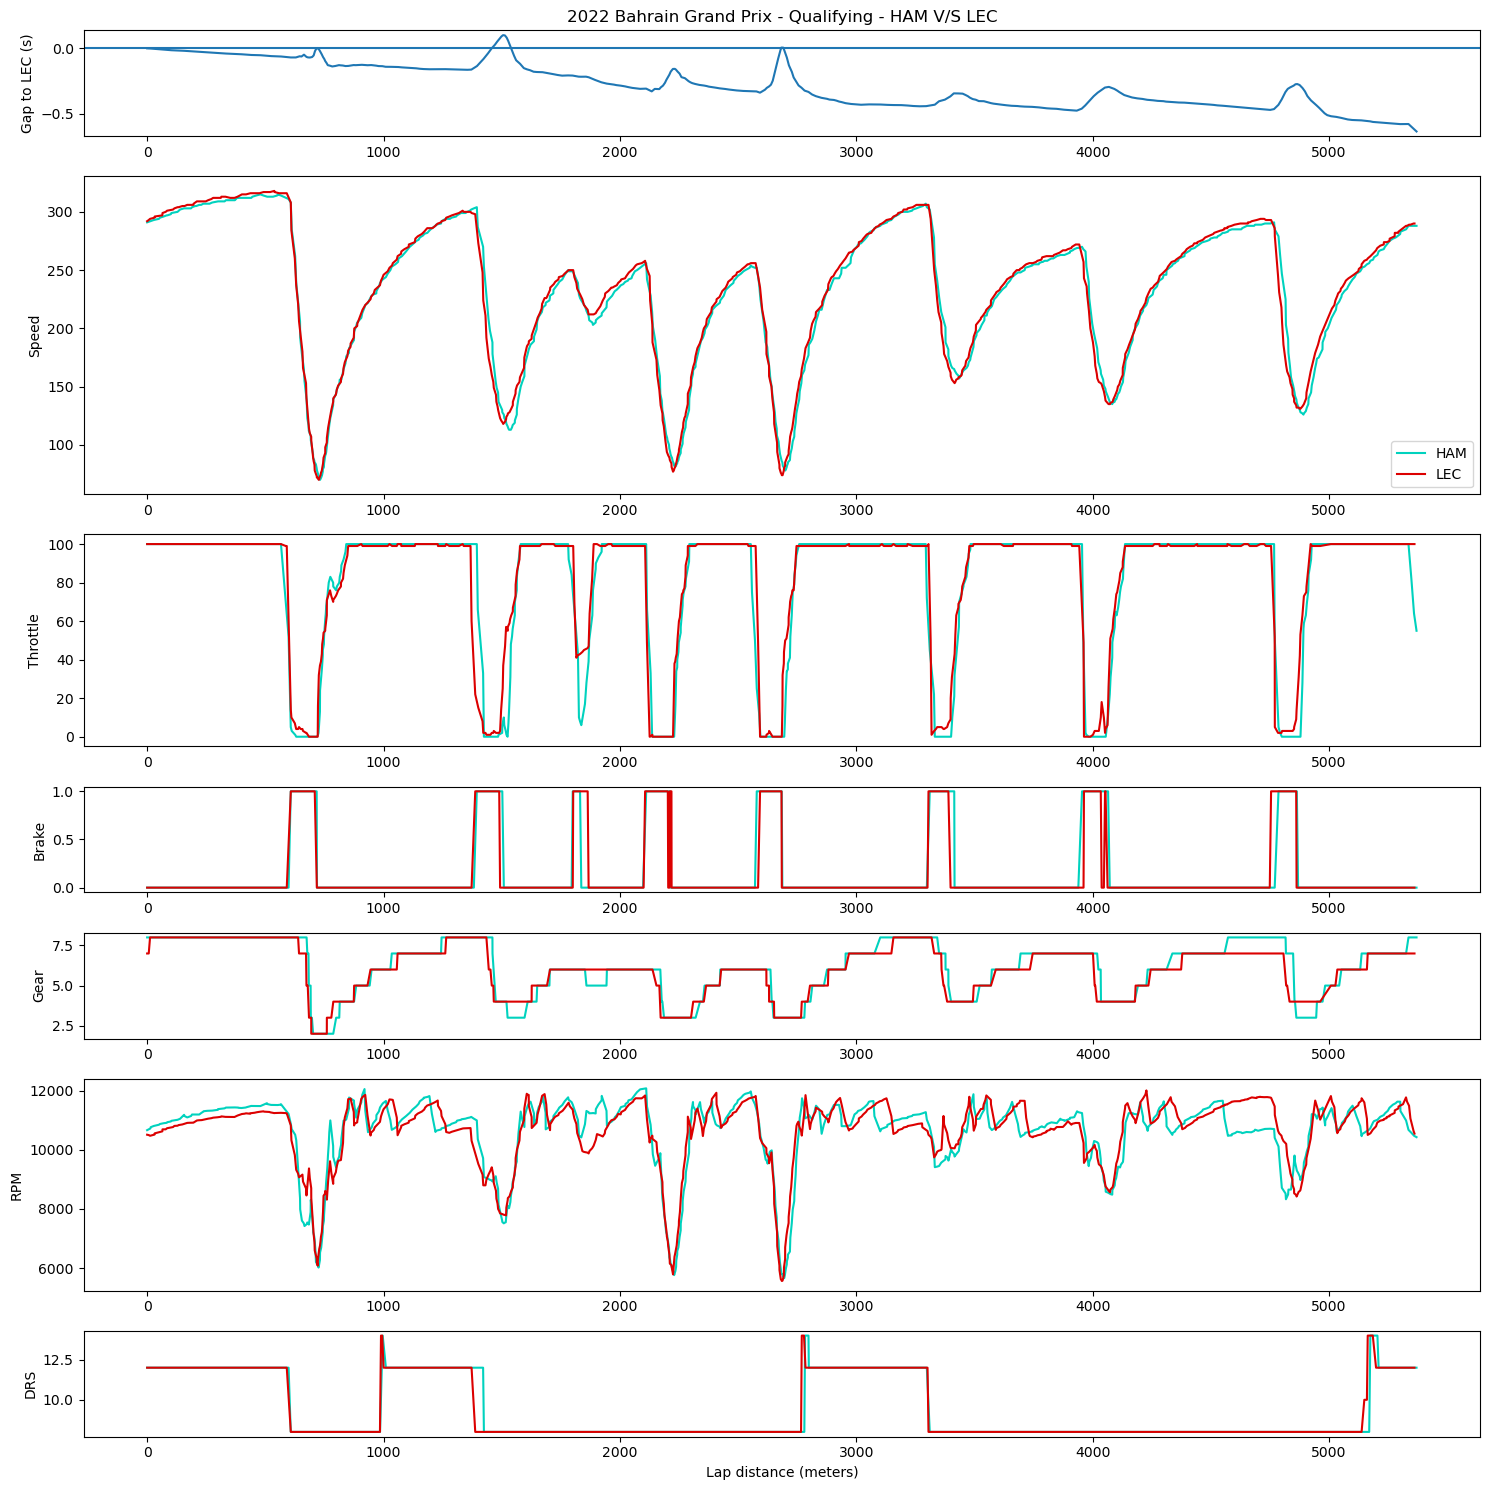

In [57]:
#plot sizes and shit
plt.rcParams['figure.figsize']=plotsize

#create subplots
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plotratios})

#set title
ax[0].title.set_text(plottitle)

#delta time plot
ax[0].plot(ref_tel['Distance'],delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {d2} (s)")

#Speed Trace
ax[1].plot(teled1['Distance'], teled1['Speed'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[1].plot(teled2['Distance'], teled2['Speed'], label=d2, color=ff1.plotting.team_color(teamd2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(teled1['Distance'], teled1['Throttle'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[2].plot(teled2['Distance'], teled2['Throttle'], label=d2, color=ff1.plotting.team_color(teamd2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(teled1['Distance'], teled1['Brake'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[3].plot(teled2['Distance'], teled2['Brake'], label=d1, color=ff1.plotting.team_color(teamd2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(teled1['Distance'], teled1['nGear'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[4].plot(teled2['Distance'], teled2['nGear'], label=d2, color=ff1.plotting.team_color(teamd2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(teled1['Distance'], teled1['RPM'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[5].plot(teled2['Distance'], teled2['RPM'], label=d2, color=ff1.plotting.team_color(teamd2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(teled1['Distance'], teled1['DRS'], label=d1, color=ff1.plotting.team_color(teamd1))
ax[6].plot(teled2['Distance'], teled2['DRS'], label=d2, color=ff1.plotting.team_color(teamd2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

#plt.savefig(plotfilename,dpi=300)
plt.show()

In [58]:
#MINISECTOR COMPARISON
teled1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2022-03-19 15:58:04.518,0 days 01:13:03.589000,,392.382778,0 days 00:00:00,10668,291,8,100,False,12,interpolation,0.000002,OnTrack,-379,1289,-159,0.000000
3,2022-03-19 15:58:04.691,0 days 01:13:03.762000,,392.382778,0 days 00:00:00.173000,10727,292,8,100,False,12,car,0.002615,OnTrack,-373,1425,-159,14.032222
4,2022-03-19 15:58:04.703,0 days 01:13:03.774000,,392.382778,0 days 00:00:00.185000,10768,292,8,100,False,12,pos,0.002797,OnTrack,-373,1435,-159,15.005556
5,2022-03-19 15:58:04.863,0 days 01:13:03.934000,,392.382778,0 days 00:00:00.345000,10810,293,8,100,False,12,pos,0.005223,OnTrack,-366,1573,-159,28.027778
6,2022-03-19 15:58:05.131,0 days 01:13:04.202000,63,392.382778,0 days 00:00:00.613000,10852,294,8,100,False,12,car,0.009305,OnTrack,-353,1855,-159,49.914444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2022-03-19 15:59:35.203,0 days 01:14:34.274000,63,258.070278,0 days 00:01:30.685000,10996,285,7,100,False,12,pos,0.991507,OnTrack,-402,844,-159,5325.592778
695,2022-03-19 15:59:35.331,0 days 01:14:34.402000,63,255.048611,0 days 00:01:30.813000,10678,288,8,100,False,12,car,0.993424,OnTrack,-396,945,-158,5335.832778
696,2022-03-19 15:59:35.483,0 days 01:14:34.554000,63,255.048611,0 days 00:01:30.965000,10579,288,8,82,False,12,pos,0.995698,OnTrack,-390,1081,-159,5347.992778
697,2022-03-19 15:59:35.623,0 days 01:14:34.694000,63,255.048611,0 days 00:01:31.105000,10480,288,8,64,False,12,pos,0.997790,OnTrack,-384,1193,-159,5359.192778


In [59]:
#telemetry needs a variable that indicates driver to create that
teled1['Driver']=d1
teled2['Driver']=d2
#merging both telemetries
telemetry=pd.concat([teled1,teled2])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2022-03-19 15:58:04.518,0 days 01:13:03.589000,,392.382778,0 days 00:00:00,10668,291,8,100,False,12,interpolation,0.000002,OnTrack,-379,1289,-159,0.000000,HAM
3,2022-03-19 15:58:04.691,0 days 01:13:03.762000,,392.382778,0 days 00:00:00.173000,10727,292,8,100,False,12,car,0.002615,OnTrack,-373,1425,-159,14.032222,HAM
4,2022-03-19 15:58:04.703,0 days 01:13:03.774000,,392.382778,0 days 00:00:00.185000,10768,292,8,100,False,12,pos,0.002797,OnTrack,-373,1435,-159,15.005556,HAM
5,2022-03-19 15:58:04.863,0 days 01:13:03.934000,,392.382778,0 days 00:00:00.345000,10810,293,8,100,False,12,pos,0.005223,OnTrack,-366,1573,-159,28.027778,HAM
6,2022-03-19 15:58:05.131,0 days 01:13:04.202000,63,392.382778,0 days 00:00:00.613000,10852,294,8,100,False,12,car,0.009305,OnTrack,-353,1855,-159,49.914444,HAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2022-03-19 15:59:48.503,0 days 01:14:47.574000,77,465.962778,0 days 00:01:30.164000,11636,288,7,100,False,12,pos,0.991791,OnTrack,-396,961,-159,5329.548333,LEC
695,2022-03-19 15:59:48.611,0 days 01:14:47.682000,77,464.673889,0 days 00:01:30.272000,11495,289,7,100,False,12,car,0.993405,OnTrack,-391,1045,-159,5338.218333,LEC
696,2022-03-19 15:59:48.683,0 days 01:14:47.754000,77,462.607222,0 days 00:01:30.344000,11064,289,7,100,False,12,pos,0.994483,OnTrack,-389,1106,-159,5343.998333,LEC
697,2022-03-19 15:59:48.851,0 days 01:14:47.922000,77,460.540556,0 days 00:01:30.512000,10634,290,7,100,False,12,car,0.997002,OnTrack,-382,1242,-158,5357.531667,LEC


In [60]:
#create minisector
minisec=25

#grab max value of distance that is known in telemetry
dist=max(telemetry['Distance'])

#generate equal mini sectors
minisecdist=dist/minisec

#initiate minisectore variable with 0m as initial pt and add multiples of miniseclength to minisectors list
minisectors=[0]
for i in range(0,(minisec-1)):
    minisectors.append(minisecdist*(i+1))

#assigning row(distance) to minisector
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda distance:(
        int((distance//minisecdist)+1)
    )
)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2022-03-19 15:58:04.518,0 days 01:13:03.589000,,392.382778,0 days 00:00:00,10668,291,8,100,False,12,interpolation,0.000002,OnTrack,-379,1289,-159,0.000000,HAM,1
3,2022-03-19 15:58:04.691,0 days 01:13:03.762000,,392.382778,0 days 00:00:00.173000,10727,292,8,100,False,12,car,0.002615,OnTrack,-373,1425,-159,14.032222,HAM,1
4,2022-03-19 15:58:04.703,0 days 01:13:03.774000,,392.382778,0 days 00:00:00.185000,10768,292,8,100,False,12,pos,0.002797,OnTrack,-373,1435,-159,15.005556,HAM,1
5,2022-03-19 15:58:04.863,0 days 01:13:03.934000,,392.382778,0 days 00:00:00.345000,10810,293,8,100,False,12,pos,0.005223,OnTrack,-366,1573,-159,28.027778,HAM,1
6,2022-03-19 15:58:05.131,0 days 01:13:04.202000,63,392.382778,0 days 00:00:00.613000,10852,294,8,100,False,12,car,0.009305,OnTrack,-353,1855,-159,49.914444,HAM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2022-03-19 15:59:48.503,0 days 01:14:47.574000,77,465.962778,0 days 00:01:30.164000,11636,288,7,100,False,12,pos,0.991791,OnTrack,-396,961,-159,5329.548333,LEC,25
695,2022-03-19 15:59:48.611,0 days 01:14:47.682000,77,464.673889,0 days 00:01:30.272000,11495,289,7,100,False,12,car,0.993405,OnTrack,-391,1045,-159,5338.218333,LEC,25
696,2022-03-19 15:59:48.683,0 days 01:14:47.754000,77,462.607222,0 days 00:01:30.344000,11064,289,7,100,False,12,pos,0.994483,OnTrack,-389,1106,-159,5343.998333,LEC,25
697,2022-03-19 15:59:48.851,0 days 01:14:47.922000,77,460.540556,0 days 00:01:30.512000,10634,290,7,100,False,12,car,0.997002,OnTrack,-382,1242,-158,5357.531667,LEC,25


In [61]:
#fastest driver per sector
#1) calculate avg speed per driver per minisector
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()

In [62]:
avgspeed

,Minisector,Driver,Speed
0,1,HAM,298.600000
1,1,LEC,301.200000
2,2,HAM,309.368421
3,2,LEC,312.000000
4,3,HAM,304.555556
5,3,LEC,298.238095
6,4,HAM,118.196078
7,4,LEC,116.630435
8,5,HAM,229.291667
9,5,LEC,226.080000


In [63]:
#select driver with highest avg speed
fastestd=avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
3
#remove the speed column and rename driver col
fastestd=fastestd[['Minisector','Driver']].rename(columns={'Driver':'FastestDriver'})

In [64]:
fastestd

,Minisector,FastestDriver
1,1,LEC
3,2,LEC
4,3,HAM
6,4,HAM
8,5,HAM
10,6,HAM
12,7,HAM
15,8,LEC
17,9,LEC
19,10,LEC


In [65]:
#joining telemetry and bove data
telemetry=telemetry.merge(fastestd,on=['Minisector'])

#sort data by distance
telemetry=telemetry.sort_values(by=['Distance'])

#convert driver abbreviation to int
telemetry.loc[telemetry['FastestDriver']==d1,'Fastestdriverint']=1
telemetry.loc[telemetry['FastestDriver']==d2,'Fastestdriverint']=2

In [66]:
#plotting
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

In [67]:
x=np.array(telemetry['X'].values)
y=np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastestdriverint'].to_numpy().astype(float)

c1 = ff1.plotting.team_color(teamd1)
c2 = ff1.plotting.team_color(teamd2)

cmap = ListedColormap([c1, c2])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


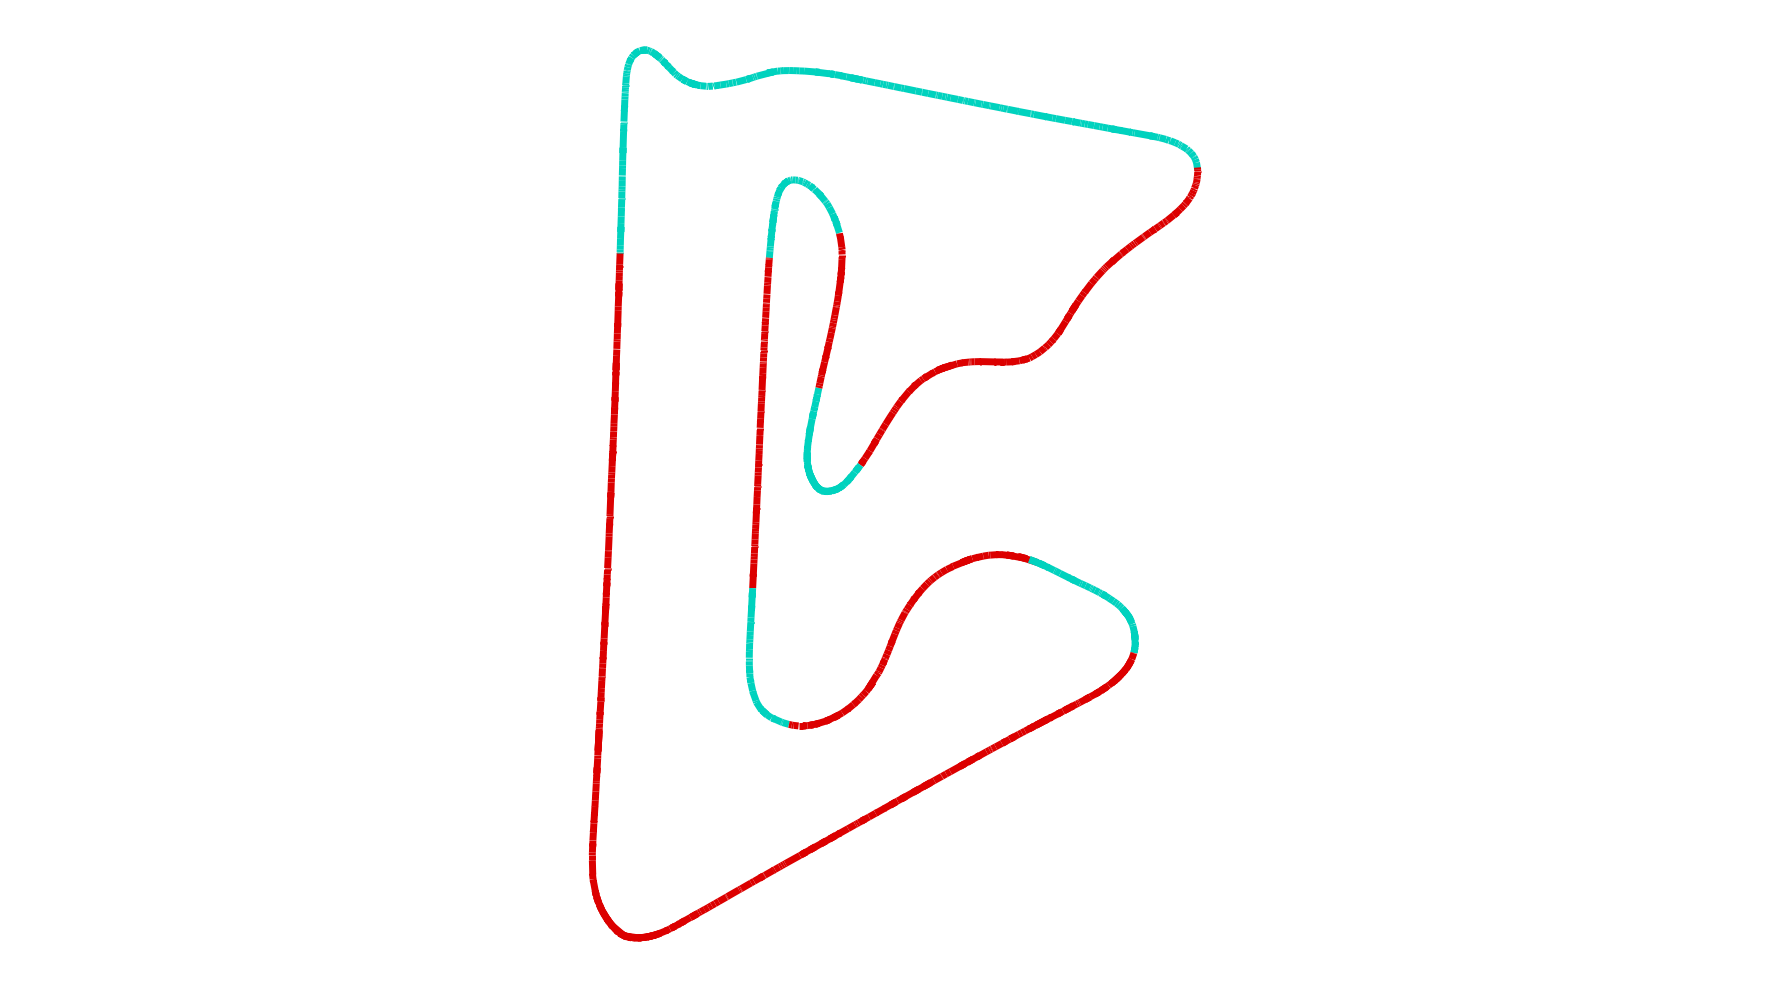

In [68]:
plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.box(False)
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

In [69]:
#GEAR SHIFTS ON THE TRACK- CAR 16 - LEC (FASTEST DRIVER)

In [70]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[

In [71]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [72]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


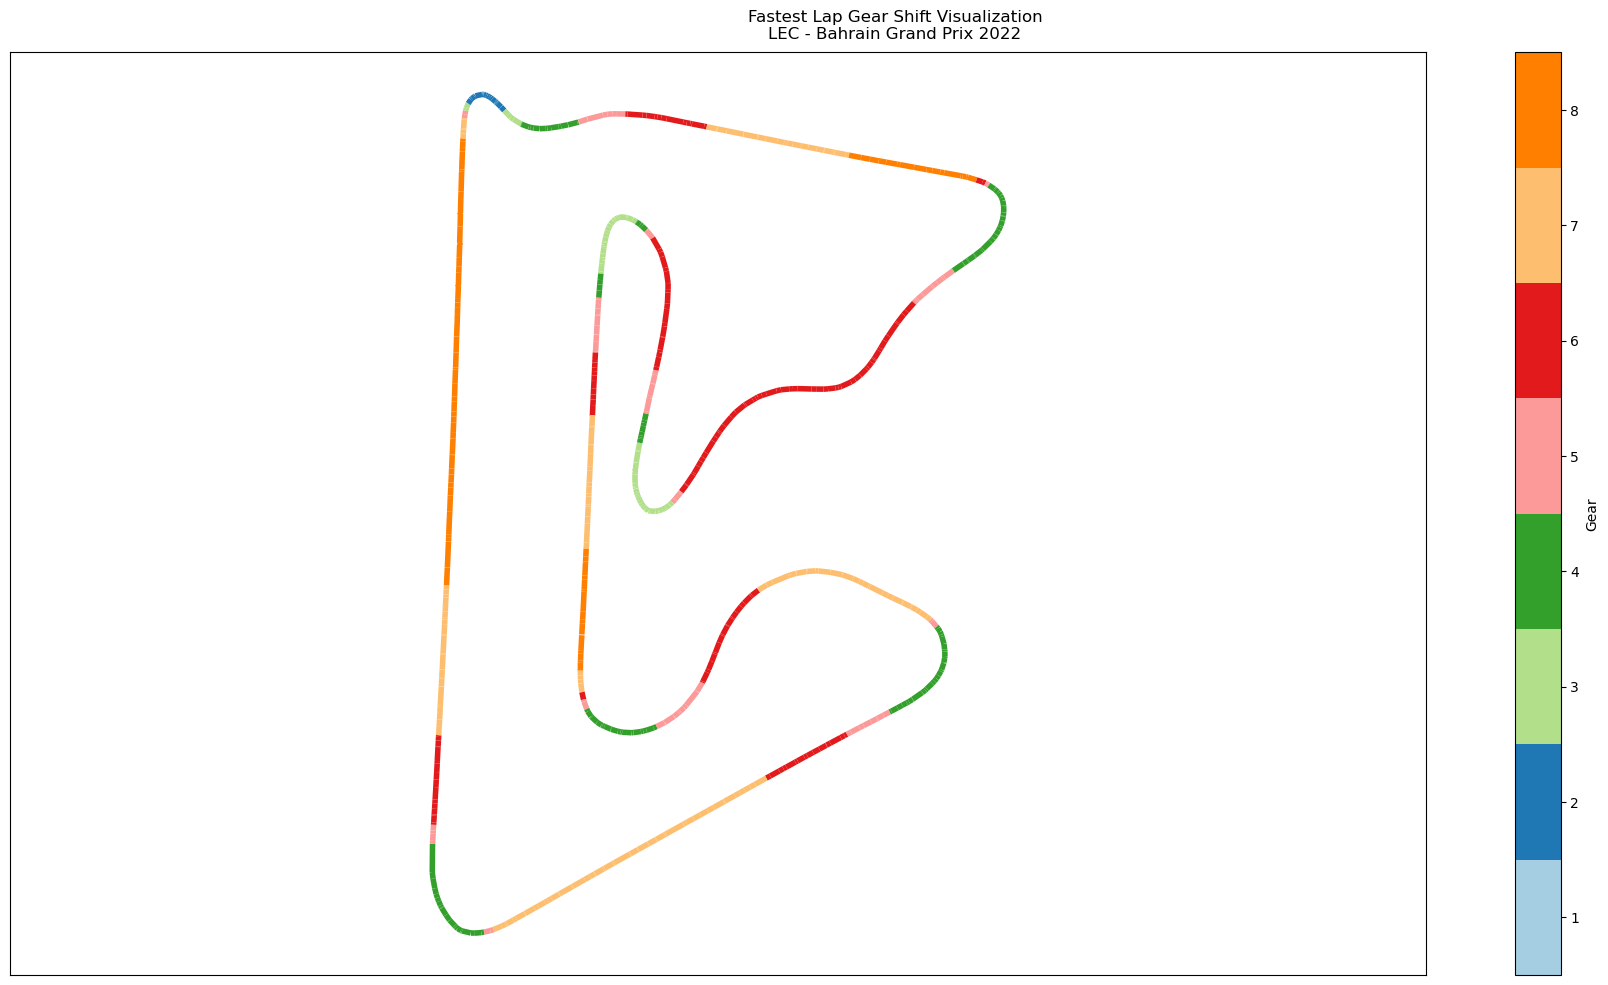

In [73]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
title = plt.suptitle(f"Fastest Lap Gear Shift Visualization\n"f"{lap['Driver']} - {session.event['EventName']} {session.event.year}")
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))
plt.show()

In [74]:
#Speed Visualisation on Track

In [75]:
year = 2022
ses = 'R'
driver = 'LEC'
weekend=session.event
x = lap.telemetry['X']              
y = lap.telemetry['Y']              
color = lap.telemetry['Speed'] 
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[

/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/fastf1/events.py:676: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(
/Users/zeelmehta/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


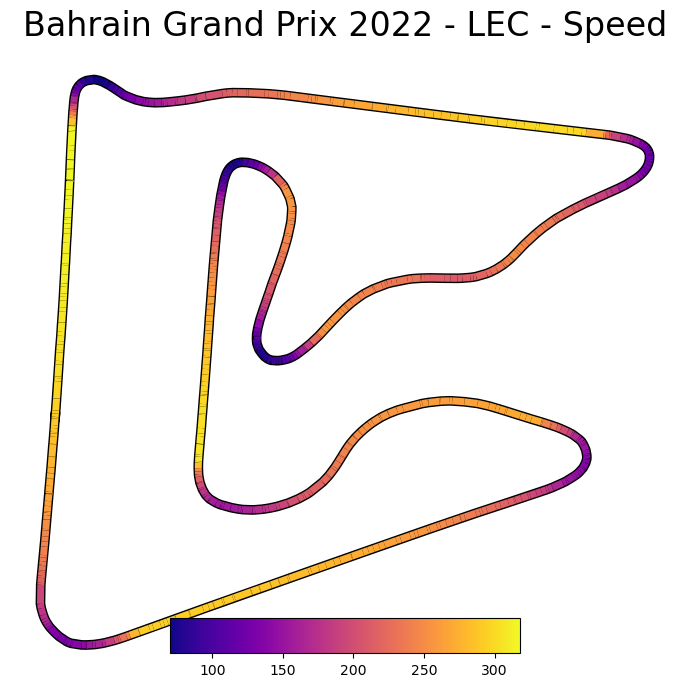

In [76]:
#PLOT
import matplotlib as mpl

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(7,7))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=7, zorder=0)
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap='plasma', norm=norm, linestyle='-', linewidth=5)
lc.set_array(color)
line = ax.add_collection(lc)
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap='plasma', orientation="horizontal")
plt.show()